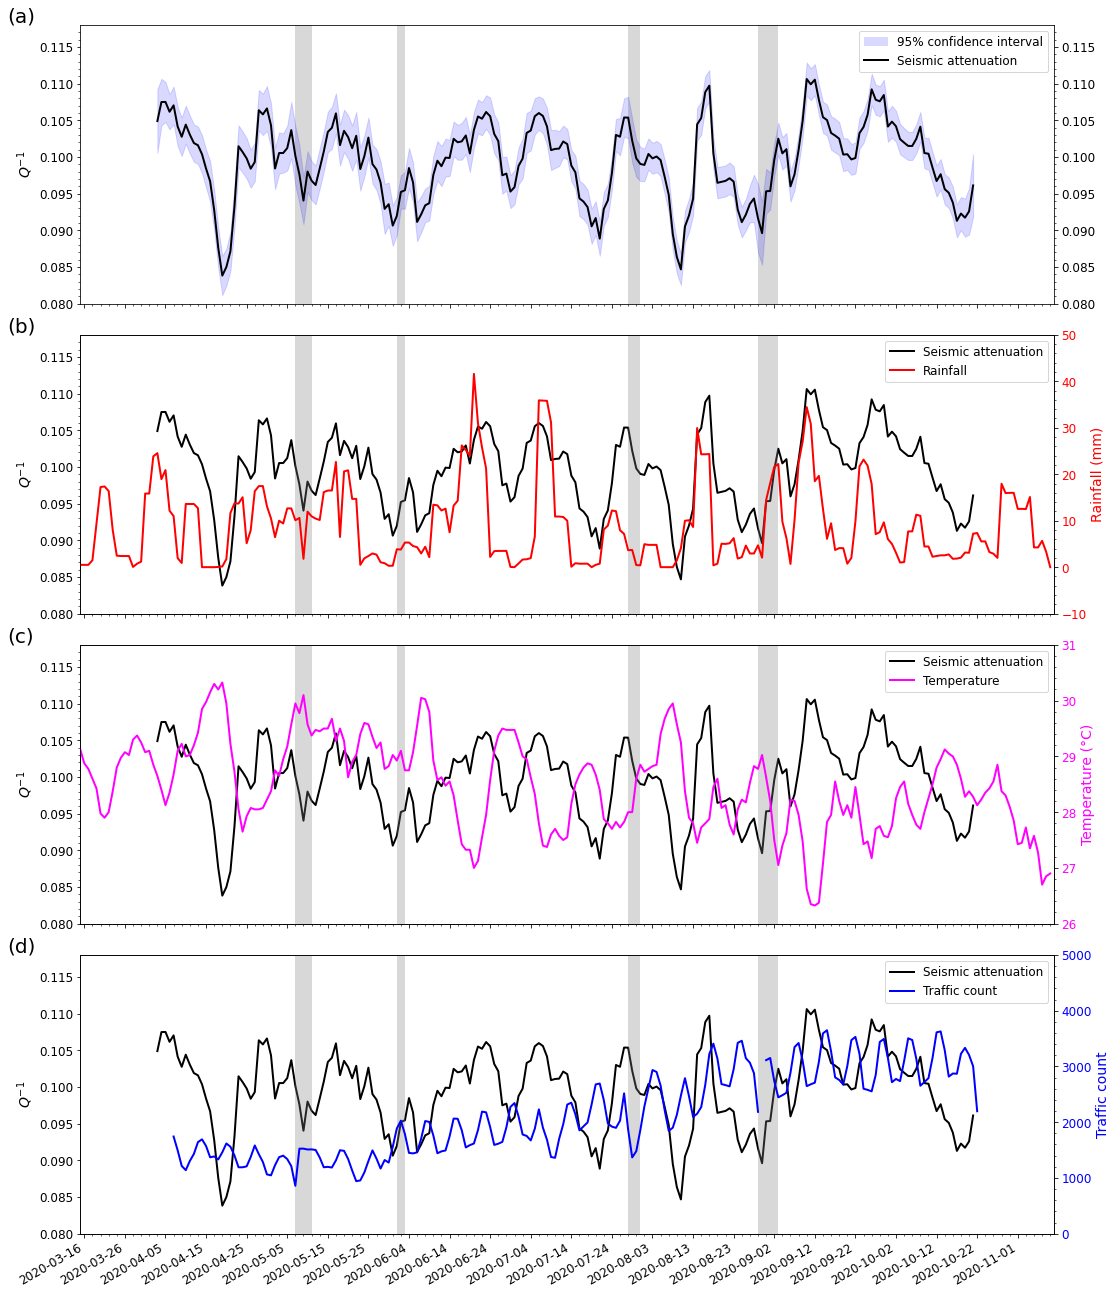

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from obspy.core import UTCDateTime
import matplotlib.dates as mdates
import matplotlib.patches as mpatches
from matplotlib.legend_handler import HandlerLine2D


starttime = UTCDateTime(2020,3,15,0,0,0)   # section begin time
endtime   = UTCDateTime(2020,11,10,0,0,0)   # section begin time


starttime_without_data1 = UTCDateTime(2020,5,7,0,0,0)   # no data begin time
endtime_without_data1   = UTCDateTime(2020,5,10,0,0,0)   # no data begin time
datelist_without_data1 = pd.date_range(starttime_without_data1.datetime, min(endtime_without_data1, UTCDateTime()).datetime, freq="D")


starttime_without_data2 = UTCDateTime(2020,6,1,0,0,0)   # no data begin time
endtime_without_data2   = UTCDateTime(2020,6,2,0,0,0)   # no data begin time
datelist_without_data2 = pd.date_range(starttime_without_data2.datetime, min(endtime_without_data2, UTCDateTime()).datetime, freq="D")


starttime_without_data3 = UTCDateTime(2020,7,28,0,0,0)   # no data begin time
endtime_without_data3   = UTCDateTime(2020,7,30,0,0,0)   # no data begin time
datelist_without_data3 = pd.date_range(starttime_without_data3.datetime, min(endtime_without_data3, UTCDateTime()).datetime, freq="D")

starttime_without_data4 = UTCDateTime(2020,8,29,0,0,0)   # no data begin time
endtime_without_data4   = UTCDateTime(2020,9,2,0,0,0)   # no data begin time
datelist_without_data4 = pd.date_range(starttime_without_data4.datetime, min(endtime_without_data4, UTCDateTime()).datetime, freq="D")




df1=pd.read_csv('S07_df_Q.csv')
df1.drop(['Unnamed: 0'], axis=1, inplace=True)

df11=pd.read_csv('S07_df_Ql.csv')
df11.drop(['Unnamed: 0'], axis=1, inplace=True)

df12=pd.read_csv('S07_df_Qu.csv')
df12.drop(['Unnamed: 0'], axis=1, inplace=True)


df2=pd.read_csv('S07_df_rf.csv')
df2.drop(['Unnamed: 0'], axis=1, inplace=True)

df3=pd.read_csv('S07_df_peaks.csv')
df3.drop(['Unnamed: 0'], axis=1, inplace=True) 
 
df4=pd.read_csv('S07_df_temp.csv')
df4.drop(['Unnamed: 0'], axis=1, inplace=True) 

S07_df01=df1.merge(df11, how='outer', on='time',sort=True)
S07_df02=S07_df01.merge(df12, how='outer', on='time',sort=True)
S07_df1=S07_df02.merge(df2, how='outer', on='time',sort=True)
S07_df2=S07_df1.merge(df3, how='outer', on='time',sort=True)
S07_df3=S07_df2.merge(df4, how='outer', on='time',sort=True)
S07_df3.to_csv('./S07_df.csv') 
df=pd.read_csv('S07_df.csv')
df.drop(['Unnamed: 0'], axis=1, inplace=True) 

fig, ax = plt.subplots(4,1,figsize=(15.5, 18))
letters='abcd'

df['time'] = list(map(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d"), df['time']))

line, = ax[0].plot(df['time'], df['Q'], color='black', linewidth=2,label='Seismic attenuation')
ax[0].fill_between(df['time'], df['Ql'],df['Qu'],color='blue',alpha=0.15)
ax[0].tick_params(bottom='on',left='on',right='on',labelright='on')
ax[0].minorticks_on()
ax[0].tick_params(axis='y', which='minor', right=True)
ax[0].set_ylabel('$Q^{-1}$',fontsize=14)
ax[0].set_ylim(0.08,0.118)

ax[0].tick_params(axis='both', which='major', labelsize=12)
patch = mpatches.Patch(facecolor='blue', alpha=0.15, linewidth=0)
ax[0].legend([patch, line], ["95% confidence interval","Seismic attenuation"], fontsize=12, handler_map = {line : HandlerLine2D(marker_pad = 0)} )
ax[0].set_xlim(starttime._get_datetime(),endtime._get_datetime())
for dbi in datelist_without_data1:
    ax[0].axvspan(dbi, dbi+datetime.timedelta(days=1),
                facecolor='gray', edgecolor=None,
                alpha=0.3, zorder=-5)

for dbi in datelist_without_data2:
    ax[0].axvspan(dbi, dbi+datetime.timedelta(days=1),
                facecolor='gray', edgecolor=None,
                alpha=0.3, zorder=-5)
    
for dbi in datelist_without_data3:
    ax[0].axvspan(dbi, dbi+datetime.timedelta(days=1),
                facecolor='gray', edgecolor=None,
                alpha=0.3, zorder=-5)

for dbi in datelist_without_data4:
    ax[0].axvspan(dbi, dbi+datetime.timedelta(days=1),
                facecolor='gray', edgecolor=None,
                alpha=0.3, zorder=-5)


myFmt = mdates.DateFormatter('%Y-%m-%d')
ax[0].xaxis.set_major_formatter(myFmt)
ax[0].xaxis.set_major_locator(mdates.DayLocator(interval=10))
ax[0].text(x=-0.075, y=1.065, transform=ax[0].transAxes, s="("+letters[0]+")", fontsize=20, 
                verticalalignment="top", bbox={"edgecolor": "w", "linewidth": 1, "facecolor": "w",})


line1, = ax[1].plot(df['time'], df['Q'], color='black',linewidth=2, label='Seismic attenuation')
ax[1].tick_params(bottom='on',left='on',right='on',labelright='on')
ax[1].minorticks_on()
ax[1].tick_params(axis='y', which='minor', right=True)
ax[1].set_ylabel('$Q^{-1}$',fontsize=14)
ax[1].set_ylim(0.08,0.118)
ax2=ax[1].twinx()
line2, = ax2.plot(df['time'], df['Rainfall'], color='r', linewidth=2, label='Rainfall')
ax2.minorticks_on()
ax2.tick_params(axis='y', which='minor', right=True)
ax2.set_ylabel('Rainfall (mm)',fontsize=14,color='r')
ax2.set_ylim(-10,50)
ax[1].tick_params(axis='both', which='major', labelsize=12)
ax2.tick_params(axis='both', which='major', labelsize=12,labelcolor='red')
ax2.set_xlim(starttime._get_datetime(),endtime._get_datetime())
plt.legend(handles=[line1, line2],fontsize=12)
for dbi in datelist_without_data1:
    plt.axvspan(dbi, dbi+datetime.timedelta(days=1),
                facecolor='gray', edgecolor=None,
                alpha=0.3, zorder=-5)


for dbi in datelist_without_data2:
    plt.axvspan(dbi, dbi+datetime.timedelta(days=1),
                facecolor='gray', edgecolor=None,
                alpha=0.3, zorder=-5)

for dbi in datelist_without_data3:
    plt.axvspan(dbi, dbi+datetime.timedelta(days=1),
                facecolor='gray', edgecolor=None,
                alpha=0.3, zorder=-5)

for dbi in datelist_without_data4:
    plt.axvspan(dbi, dbi+datetime.timedelta(days=1),
                facecolor='gray', edgecolor=None,
                alpha=0.3, zorder=-5)


myFmt = mdates.DateFormatter('%Y-%m-%d')
ax[1].xaxis.set_major_formatter(myFmt)
ax[1].xaxis.set_major_locator(mdates.DayLocator(interval=10))
ax[1].text(x=-0.075, y=1.065, transform=ax[1].transAxes, s="("+letters[1]+")", fontsize=20, 
                verticalalignment="top", bbox={"edgecolor": "w", "linewidth": 1, "facecolor": "w",})



line1, = ax[2].plot(df['time'], df['Q'], color='black',linewidth=2, label='Seismic attenuation')
ax[2].tick_params(bottom='on',left='on',right='on',labelright='on')
ax[2].minorticks_on()
ax[2].tick_params(axis='y', which='minor', right=True)
ax[2].set_ylabel('$Q^{-1}$',fontsize=14)
ax[2].set_ylim(0.08,0.118)
ax3=ax[2].twinx()
line2, = ax3.plot(df['time'], df['Temperature'], color='magenta',linewidth=2, label='Temperature')
ax3.minorticks_on()
ax3.tick_params(axis='y', which='minor', right=True)
ax3.set_ylabel('Temperature (°C)',fontsize=14,color='magenta')

ax3.set_ylim(26,31)
ax[2].tick_params(axis='both', which='major', labelsize=12)
ax3.tick_params(axis='both', which='major', labelsize=12,labelcolor='magenta')
ax3.set_xlim(starttime._get_datetime(),endtime._get_datetime())
plt.legend(handles=[line1, line2],fontsize=12)

for dbi in datelist_without_data1:
    plt.axvspan(dbi, dbi+datetime.timedelta(days=1),
                facecolor='gray', edgecolor=None,
                alpha=0.3, zorder=-5)

for dbi in datelist_without_data2:
    plt.axvspan(dbi, dbi+datetime.timedelta(days=1),
                facecolor='gray', edgecolor=None,
                alpha=0.3, zorder=-5)

for dbi in datelist_without_data3:
    plt.axvspan(dbi, dbi+datetime.timedelta(days=1),
                facecolor='gray', edgecolor=None,
                alpha=0.3, zorder=-5)

for dbi in datelist_without_data4:
    plt.axvspan(dbi, dbi+datetime.timedelta(days=1),
                facecolor='gray', edgecolor=None,
                alpha=0.3, zorder=-5)

myFmt = mdates.DateFormatter('%Y-%m-%d')
ax[2].xaxis.set_major_formatter(myFmt)
ax[2].xaxis.set_major_locator(mdates.DayLocator(interval=10))
ax[2].text(x=-0.075, y=1.065, transform=ax[2].transAxes, s="("+letters[2]+")", fontsize=20, 
                verticalalignment="top", bbox={"edgecolor": None, "linewidth": 0, "facecolor": "w",})


line1, = ax[3].plot(df['time'], df['Q'], color='black',linewidth=2, label='Seismic attenuation')
ax[3].tick_params(bottom='on',left='on',right='on',labelright='on')
ax[3].tick_params(axis='y', which='minor', right=True)
ax[3].set_ylabel('$Q^{-1}$',fontsize=14)
ax[3].set_ylim(0.08,0.118)
ax4=ax[3].twinx()
line2, = ax4.plot(df['time'], df['Traffic Count'], color='blue',linewidth=2,label='Traffic count')
ax4.minorticks_on()
ax4.tick_params(axis='y', which='minor', right=True)
ax4.set_ylabel('Traffic count',fontsize=14,color='b')

ax4.set_ylim(0,5000)
ax[3].tick_params(axis='both', which='major', labelsize=12)
ax4.tick_params(axis='both', which='major', labelsize=12,labelcolor='b')
ax4.set_xlim(starttime._get_datetime(),endtime._get_datetime())
plt.legend(handles=[line1, line2],fontsize=12)

for dbi in datelist_without_data1:
    plt.axvspan(dbi, dbi+datetime.timedelta(days=1),
                facecolor='gray', edgecolor=None,
                alpha=0.3, zorder=-5)

for dbi in datelist_without_data2:
    plt.axvspan(dbi, dbi+datetime.timedelta(days=1),
                facecolor='gray', edgecolor=None,
                alpha=0.3, zorder=-5)

for dbi in datelist_without_data3:
    plt.axvspan(dbi, dbi+datetime.timedelta(days=1),
                facecolor='gray', edgecolor=None,
                alpha=0.3, zorder=-5)

for dbi in datelist_without_data4:
    plt.axvspan(dbi, dbi+datetime.timedelta(days=1),
                facecolor='gray', edgecolor=None,
                alpha=0.3, zorder=-5)

myFmt = mdates.DateFormatter('%Y-%m-%d')
ax[3].xaxis.set_major_formatter(myFmt)
ax[3].xaxis.set_major_locator(mdates.DayLocator(interval=10))
ax[3].text(x=-0.075, y=1.065, transform=ax[3].transAxes, s="("+letters[3]+")", fontsize=20, 
                verticalalignment="top", bbox={"edgecolor": None, "linewidth": 0, "facecolor": "w",})

fig.autofmt_xdate()
fig.tight_layout()
plt.savefig("Figure_NUS_all_new.jpg", bbox_inches = 'tight',dpi=600)


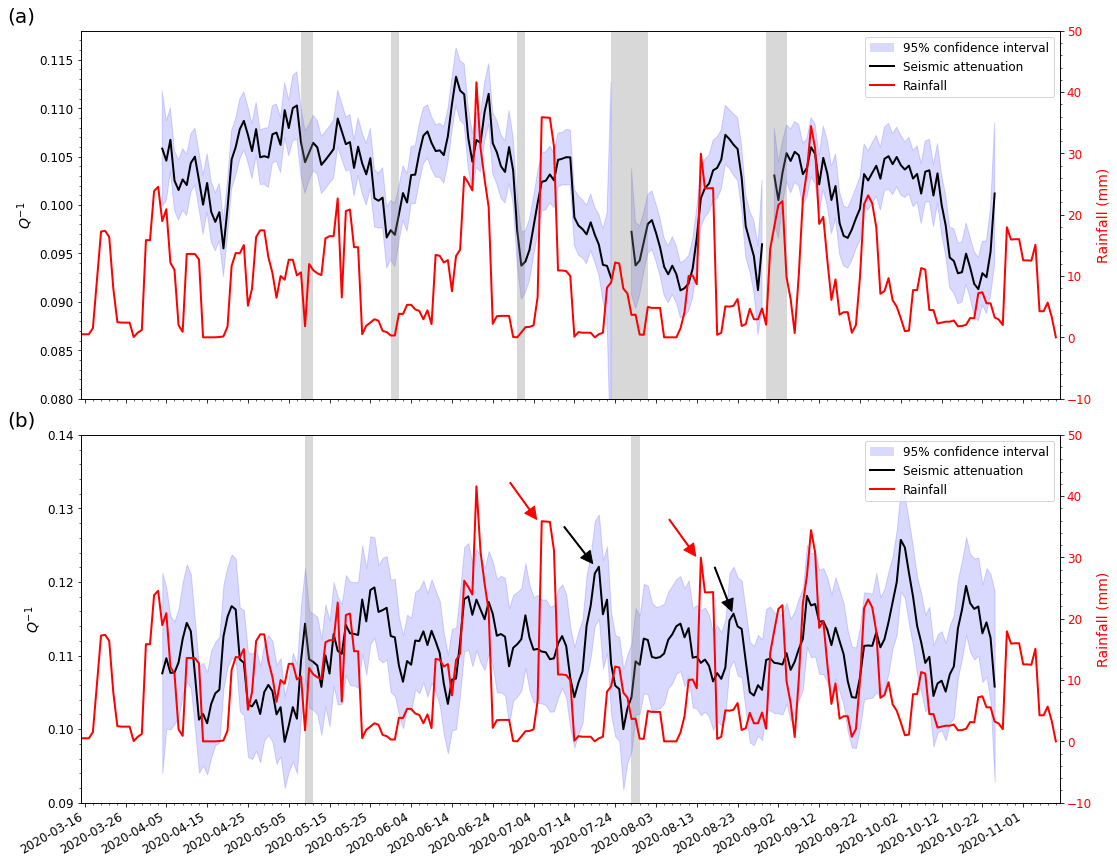

In [55]:
starttime_without_data1 = UTCDateTime(2020,5,8,0,0,0)   # no data begin time
endtime_without_data1   = UTCDateTime(2020,5,10,0,0,0)   # no data begin time
datelist_without_data1 = pd.date_range(starttime_without_data1.datetime, min(endtime_without_data1, UTCDateTime()).datetime, freq="D")

starttime_without_data2 = UTCDateTime(2020,5,30,0,0,0)   # no data begin time
endtime_without_data2   = UTCDateTime(2020,5,31,0,0,0)   # no data begin time
datelist_without_data2 = pd.date_range(starttime_without_data2.datetime, min(endtime_without_data2, UTCDateTime()).datetime, freq="D")


starttime_without_data3 = UTCDateTime(2020,6,30,0,0,0)   # no data begin time
endtime_without_data3   = UTCDateTime(2020,7,1,0,0,0)   # no data begin time
datelist_without_data3 = pd.date_range(starttime_without_data3.datetime, min(endtime_without_data3, UTCDateTime()).datetime, freq="D")

starttime_without_data4 = UTCDateTime(2020,7,23,0,0,0)   # no data begin time
endtime_without_data4   = UTCDateTime(2020,7,31,0,0,0)   # no data begin time
datelist_without_data4 = pd.date_range(starttime_without_data4.datetime, min(endtime_without_data4, UTCDateTime()).datetime, freq="D")


starttime_without_data5 = UTCDateTime(2020,8,30,0,0,0)   # no data begin time
endtime_without_data5   = UTCDateTime(2020,9,3,0,0,0)   # no data begin time
datelist_without_data5 = pd.date_range(starttime_without_data5.datetime, min(endtime_without_data5, UTCDateTime()).datetime, freq="D")



df1=pd.read_csv('S15_df_Q.csv')
df1.drop(['Unnamed: 0'], axis=1, inplace=True)

df11=pd.read_csv('S15_df_Ql.csv')
df11.drop(['Unnamed: 0'], axis=1, inplace=True)

df12=pd.read_csv('S15_df_Qu.csv')
df12.drop(['Unnamed: 0'], axis=1, inplace=True)


df2=pd.read_csv('S15_df_rf.csv')
df2.drop(['Unnamed: 0'], axis=1, inplace=True)

df3=pd.read_csv('S15_df_peaks.csv')
df3.drop(['Unnamed: 0'], axis=1, inplace=True) 
 
df4=pd.read_csv('S15_df_temp.csv')
df4.drop(['Unnamed: 0'], axis=1, inplace=True) 

S15_df01=df1.merge(df11, how='outer', on='time',sort=True)
S15_df02=S15_df01.merge(df12, how='outer', on='time',sort=True)
S15_df1=S15_df02.merge(df2, how='outer', on='time',sort=True)
S15_df2=S15_df1.merge(df3, how='outer', on='time',sort=True)
S15_df3=S15_df2.merge(df4, how='outer', on='time',sort=True)
S15_df3.to_csv('./S15_df.csv') 
df15=pd.read_csv('S15_df.csv')
df15.drop(['Unnamed: 0'], axis=1, inplace=True) 



df1=pd.read_csv('S16_df_Q.csv')
df1.drop(['Unnamed: 0'], axis=1, inplace=True)

df11=pd.read_csv('S16_df_Ql.csv')
df11.drop(['Unnamed: 0'], axis=1, inplace=True)

df12=pd.read_csv('S16_df_Qu.csv')
df12.drop(['Unnamed: 0'], axis=1, inplace=True)


df2=pd.read_csv('S16_df_rf.csv')
df2.drop(['Unnamed: 0'], axis=1, inplace=True)

df3=pd.read_csv('S16_df_peaks.csv')
df3.drop(['Unnamed: 0'], axis=1, inplace=True) 
 
df4=pd.read_csv('S16_df_temp.csv')
df4.drop(['Unnamed: 0'], axis=1, inplace=True) 

S16_df01=df1.merge(df11, how='outer', on='time',sort=True)
S16_df02=S16_df01.merge(df12, how='outer', on='time',sort=True)
S16_df1=S16_df02.merge(df2, how='outer', on='time',sort=True)
S16_df2=S16_df1.merge(df3, how='outer', on='time',sort=True)
S16_df3=S16_df2.merge(df4, how='outer', on='time',sort=True)
S16_df3.to_csv('./S16_df.csv') 
df16=pd.read_csv('S16_df.csv')

df16.drop(['Unnamed: 0'], axis=1, inplace=True) 



fig, ax = plt.subplots(2,1,figsize=(15.5, 12))
letters='abcd'

df15['time'] = list(map(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d"), df15['time']))
df16['time'] = list(map(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d"), df16['time']))

line1, = ax[0].plot(df15['time'], df15['Q'], color='black', linewidth=2,label='Seismic attenuation')
ax[0].fill_between(df15['time'], df15['Ql'],df15['Qu'],color='blue',alpha=0.15)
ax[0].tick_params(bottom='on',left='on',right='on',labelright='on')
ax[0].minorticks_on()
ax[0].tick_params(axis='y', which='minor', right=True)
ax[0].set_ylabel('$Q^{-1}$',fontsize=14)
ax[0].set_ylim(0.08,0.118)
ax0=ax[0].twinx()
line2, = ax0.plot(df15['time'], df15['Rainfall'], color='r', linewidth=2, label='Rainfall')
ax0.minorticks_on()
ax0.tick_params(axis='y', which='minor', right=True)
ax0.set_ylabel('Rainfall (mm)',fontsize=14,color='r')
ax0.set_ylim(-10,50)
ax[0].tick_params(axis='both', which='major', labelsize=12)
ax0.tick_params(axis='both', which='major', labelsize=12,labelcolor='r')
ax0.set_xlim(starttime._get_datetime(),endtime._get_datetime())
patch = mpatches.Patch(facecolor='blue', alpha=0.15, linewidth=0)
ax[0].legend([patch, line1, line2], ["95% confidence interval","Seismic attenuation","Rainfall"], fontsize=12, handler_map = {line1 : HandlerLine2D(marker_pad = 0)} )

for dbi in datelist_without_data1:
    plt.axvspan(dbi, dbi+datetime.timedelta(days=1),
                facecolor='gray', edgecolor=None,
                alpha=0.3, zorder=-5)

for dbi in datelist_without_data2:
    plt.axvspan(dbi, dbi+datetime.timedelta(days=1),
                facecolor='gray', edgecolor=None,
                alpha=0.3, zorder=-5)
    
for dbi in datelist_without_data3:
    plt.axvspan(dbi, dbi+datetime.timedelta(days=1),
                facecolor='gray', edgecolor=None,
                alpha=0.3, zorder=-5)

for dbi in datelist_without_data4:
    plt.axvspan(dbi, dbi+datetime.timedelta(days=1),
                facecolor='gray', edgecolor=None,
                alpha=0.3, zorder=-5)

for dbi in datelist_without_data5:
    plt.axvspan(dbi, dbi+datetime.timedelta(days=1),
                facecolor='gray', edgecolor=None,
                alpha=0.3, zorder=-5)
    

myFmt = mdates.DateFormatter('%Y-%m-%d')
ax[0].xaxis.set_major_formatter(myFmt)
ax[0].xaxis.set_major_locator(mdates.DayLocator(interval=10))
ax[0].text(x=-0.075, y=1.065, transform=ax[0].transAxes, s="("+letters[0]+")", fontsize=20, 
                verticalalignment="top")





line1, = ax[1].plot(df16['time'], df16['Q'], color='black',linewidth=2, label='Seismic attenuation')
ax[1].fill_between(df16['time'], df16['Ql'],df16['Qu'],color='blue',alpha=0.15)
ax[1].tick_params(bottom='on',left='on',right='on',labelright='on')
ax[1].minorticks_on()
ax[1].tick_params(axis='y', which='minor', right=True)
ax[1].set_ylabel('$Q^{-1}$',fontsize=14)
ax[1].set_ylim(0.09,0.14)
ax2=ax[1].twinx()
line2, = ax2.plot(df16['time'], df16['Rainfall'], color='r',linewidth=2, label='Rainfall')
ax2.minorticks_on()
ax2.tick_params(axis='y', which='minor', right=True)
ax2.set_ylabel('Rainfall (mm)',fontsize=14,color='r')
ax2.set_ylim(-10,50)
ax[1].tick_params(axis='both', which='major', labelsize=12)
ax2.tick_params(axis='both', which='major', labelsize=12,labelcolor='r')
ax2.set_xlim(starttime._get_datetime(),endtime._get_datetime())
# plt.legend(handles=[line1, line2],fontsize=12)
patch = mpatches.Patch(facecolor='blue', alpha=0.15, linewidth=0)
ax[1].legend([patch, line1, line2], ["95% confidence interval","Seismic attenuation","Rainfall"], fontsize=12, handler_map = {line1 : HandlerLine2D(marker_pad = 0)} )



starttime_without_data1 = UTCDateTime(2020,5,9,0,0,0)   # no data begin time
endtime_without_data1   = UTCDateTime(2020,5,10,0,0,0)   # no data begin time
datelist_without_data1 = pd.date_range(starttime_without_data1.datetime, min(endtime_without_data1, UTCDateTime()).datetime, freq="D")



starttime_without_data2 = UTCDateTime(2020,7,28,0,0,0)   # no data begin time
endtime_without_data2   = UTCDateTime(2020,7,29,0,0,0)   # no data begin time
datelist_without_data2 = pd.date_range(starttime_without_data2.datetime, min(endtime_without_data2, UTCDateTime()).datetime, freq="D")


for dbi in datelist_without_data1:
    plt.axvspan(dbi, dbi+datetime.timedelta(days=1),
                facecolor='gray', edgecolor=None,
                alpha=0.3, zorder=-5)


for dbi in datelist_without_data2:
    plt.axvspan(dbi, dbi+datetime.timedelta(days=1),
                facecolor='gray', edgecolor=None,
                alpha=0.3, zorder=-5)


myFmt = mdates.DateFormatter('%Y-%m-%d')
ax[1].xaxis.set_major_formatter(myFmt)
ax[1].xaxis.set_major_locator(mdates.DayLocator(interval=10))
ax[1].text(x=-0.075, y=1.065, transform=ax[1].transAxes, s="("+letters[1]+")", fontsize=20, 
                verticalalignment="top")

ax[1].annotate('', xy=(datetime.datetime(2020, 7, 8, 0, 0), 0.126), xytext=(datetime.datetime(2020, 6, 25, 0, 0), 0.136),
            arrowprops=dict(color='red', width=1, shrink=0.25),
            )    

ax[1].annotate('', xy=(datetime.datetime(2020, 7, 22, 0, 0), 0.120), xytext=(datetime.datetime(2020, 7, 8, 0, 0), 0.130),
            arrowprops=dict(color='black', width=1, shrink=0.25),
            )  

ax[1].annotate('', xy=(datetime.datetime(2020, 8, 16, 0, 0), 0.121), xytext=(datetime.datetime(2020, 8, 3, 0, 0), 0.131),
            arrowprops=dict(color='red', width=1, shrink=0.25),
            )    

ax[1].annotate('', xy=(datetime.datetime(2020, 8, 23, 0, 0), 0.114), xytext=(datetime.datetime(2020, 8, 16, 0, 0), 0.124),
            arrowprops=dict(color='black', width=1, shrink=0.2),
            )   

fig.autofmt_xdate()
fig.tight_layout()
plt.savefig("Figure_WCHW_PK.jpg", bbox_inches = 'tight',dpi=600)